# *importing required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import warnings
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')



# * reading dataset

In [2]:
sales=pd.read_csv('Sales.csv')
print(sales)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


# 1.FEATURE ENGINEERING


# checking for outliers

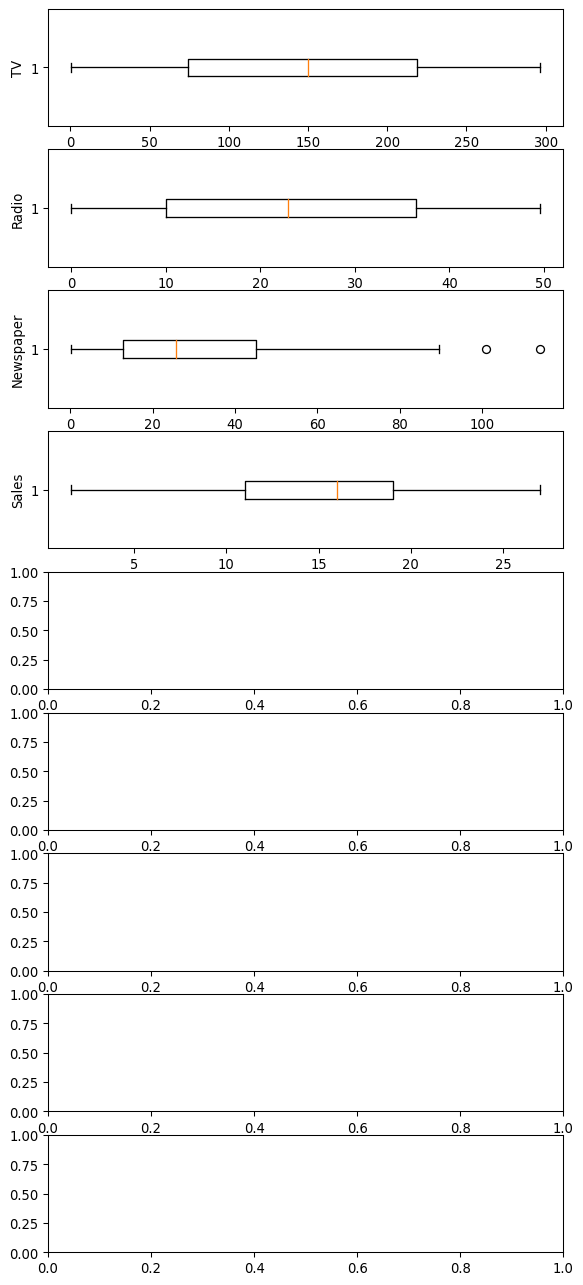

In [3]:
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in sales.columns:
    axs[i].boxplot(sales[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

# drop the outliers

In [4]:
q1, q3 = np.percentile(sales['TV'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = sales[(sales['TV'] >= lower_bound) 
                & (sales['TV'] <= upper_bound)]

q1, q3 = np.percentile(clean_data['Radio'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['Radio'] >= lower_bound) 
                        & (clean_data['Radio'] <= upper_bound)]
q1, q3 = np.percentile(clean_data['Newspaper'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['Newspaper'] >= lower_bound) 
                        & (clean_data['Newspaper'] <= upper_bound)]

q1, q3 = np.percentile(clean_data['Sales'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['Sales'] >= lower_bound) 
                        & (clean_data['Sales'] <= upper_bound)]

# 2.TRAINING THE DATASET

In [5]:
x = sales['TV']
y = sales['Sales']

In [10]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
 random_state=42)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,
 test_size = 0.3, random_state = 100)

In [13]:
x_train.head()


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [14]:
y_train.head()


74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [16]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [17]:
 print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        21:32:11   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

# *plot for the dataset training

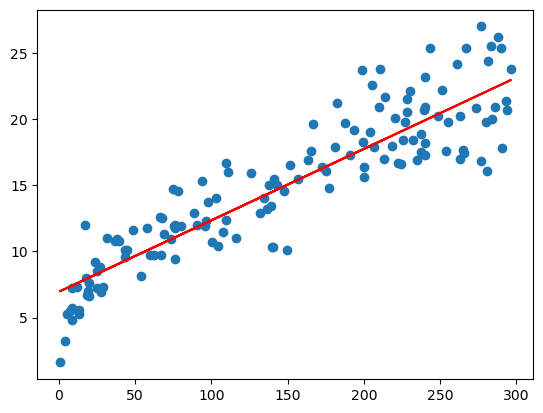

In [18]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()


# 4.EVALUATION OF DATAMODEL

In [19]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)


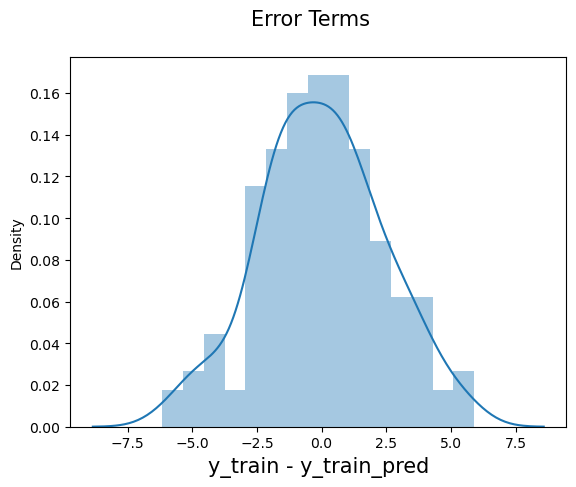

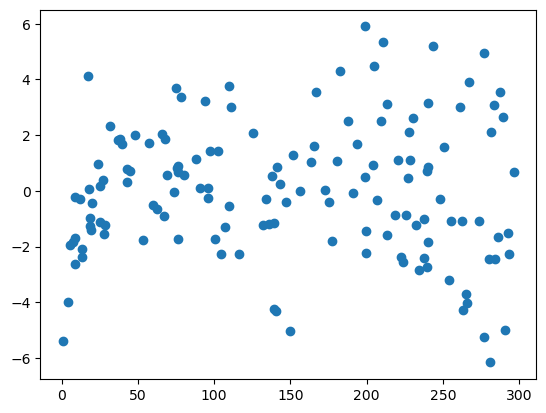

In [20]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()
plt.scatter(x_train,res)
plt.show()

In [21]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)
y_pred.head()


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

# *mean squared error

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

# * R squared evaluation

In [23]:
r_squared = r2_score(y_test, y_pred)
r_squared


0.7921031601245659

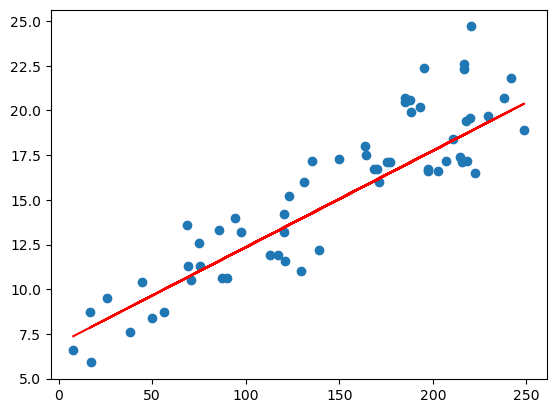

In [24]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()